# Extract outer point cloud

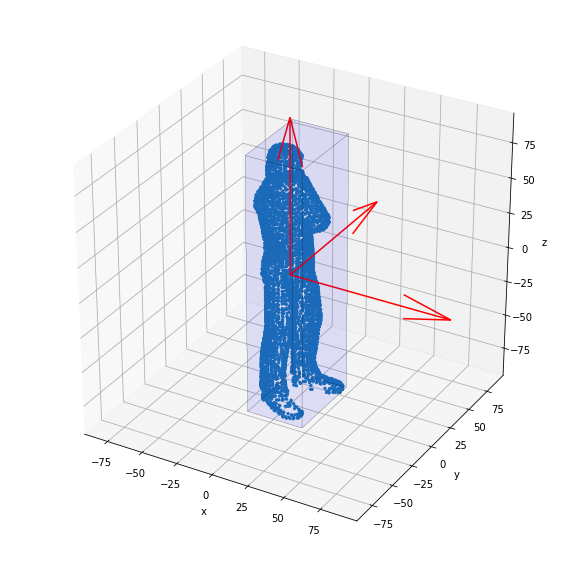

In [9]:
import numpy as np
from visualization import *

pc = np.load("/media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/point_dataset/2_outer/pedestrian/pedestrian_0015_align_se.npy")

%matplotlib inline
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1, projection='3d')
pc = resample_point_cloud(pc, 1.0)
display_point_cloud_box_ax_test(ax, pc)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

## Extract outer point cloud

In [18]:
import numpy as np

import tqdm

pc = np.load("/media/kyungpyo/SmartCarContest/MasterThesisProject/new_dataset/dataset/stl_dataset/car_np_point_align_align/car_0115_align_align.npy")

pcv = pc.copy()

pcv -= np.min(pcv)
max_val = np.max(abs(pcv))
    
# resolution
n_resolution = 100

val_resolution = max_val / (n_resolution-1)

# grid take index and value
grid_x_td = -1 * np.ones( (n_resolution, n_resolution, 2))
grid_x_bu = -1 * np.ones( (n_resolution, n_resolution, 2))
grid_x_bu[:,:,1] = max_val
grid_y_td = -1 * np.ones( (n_resolution, n_resolution, 2))
grid_y_bu = -1 * np.ones( (n_resolution, n_resolution, 2))
grid_y_bu[:,:,1] = max_val
grid_z_td = -1 * np.ones( (n_resolution, n_resolution, 2))

for i in tqdm.trange( len(pcv) ):

    value = pcv[i]

    grid_x = int(value[0] / val_resolution)
    grid_y = int(value[1] / val_resolution)
    grid_z = int(value[2] / val_resolution)
    
    # x top-down
    if grid_x_td[grid_y, grid_z, 1] < value[0]:
        grid_x_td[grid_y, grid_z, 0] = i
        grid_x_td[grid_y, grid_z, 1] = value[0]        

    # x bottom-up
    if grid_x_bu[grid_y, grid_z, 1] > value[0]:
        grid_x_bu[grid_y, grid_z, 0] = i
        grid_x_bu[grid_y, grid_z, 1] = value[0]     
        
    # y top-down
    if grid_y_td[grid_z, grid_x, 1] < value[1]:
        grid_y_td[grid_z, grid_x, 0] = i
        grid_y_td[grid_z, grid_x, 1] = value[1]        

    # y bottom-up
    if grid_y_bu[grid_z, grid_x, 1] > value[1]:
        grid_y_bu[grid_z, grid_x, 0] = i
        grid_y_bu[grid_z, grid_x, 1] = value[1]     
        
    # z bottom-up
    if grid_z_td[grid_x, grid_y, 1] < value[2]:
        grid_z_td[grid_x, grid_y, 0] = i
        grid_z_td[grid_x, grid_y, 1] = value[2]     
    
    
outer_idx_x_td = np.unique(grid_x_td[:,:,0]).astype(np.int)[1:]
outer_idx_x_bu = np.unique(grid_x_bu[:,:,0]).astype(np.int)[1:]
outer_idx_y_td = np.unique(grid_y_td[:,:,0]).astype(np.int)[1:]
outer_idx_y_bu = np.unique(grid_y_bu[:,:,0]).astype(np.int)[1:]
outer_idx_z_td = np.unique(grid_z_td[:,:,0]).astype(np.int)[1:]

outer_idx = np.concatenate( (outer_idx_x_td,outer_idx_x_bu) , axis = 0)
outer_idx = np.concatenate( (outer_idx,outer_idx_y_td) , axis = 0)
outer_idx = np.concatenate( (outer_idx,outer_idx_y_bu) , axis = 0)
outer_idx = np.concatenate( (outer_idx,outer_idx_z_td) , axis = 0)
outer_idx = np.unique(outer_idx)

# pc[:,2] = 0
pc = pc[outer_idx]
pc -= np.mean(pc, axis = 0)

%matplotlib qt
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1, projection='3d')
pc = resample_point_cloud(pc, 1.0)
display_point_cloud_box_ax_test(ax, pc)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

print "len" , len(pc)

100%|██████████| 100000/100000 [00:00<00:00, 307396.40it/s]

len 6974


## Function

In [3]:
import numpy as np

def extract_surface_point(pc):
    
    pcv = pc.copy()

    pcv -= np.min(pcv)
    max_val = np.max(abs(pcv))

    # resolution
    n_resolution = 100

    val_resolution = max_val / (n_resolution-1)

    # grid take index and value
    grid_x_td = -1 * np.ones( (n_resolution, n_resolution, 2))
    grid_x_bu = -1 * np.ones( (n_resolution, n_resolution, 2))
    grid_x_bu[:,:,1] = max_val
    grid_y_td = -1 * np.ones( (n_resolution, n_resolution, 2))
    grid_y_bu = -1 * np.ones( (n_resolution, n_resolution, 2))
    grid_y_bu[:,:,1] = max_val
    grid_z_td = -1 * np.ones( (n_resolution, n_resolution, 2))

    for i in range( len(pcv) ):

        value = pcv[i]

        grid_x = int(value[0] / val_resolution)
        grid_y = int(value[1] / val_resolution)
        grid_z = int(value[2] / val_resolution)

        # x top-down
        if grid_x_td[grid_y, grid_z, 1] < value[0]:
            grid_x_td[grid_y, grid_z, 0] = i
            grid_x_td[grid_y, grid_z, 1] = value[0]        

        # x bottom-up
        if grid_x_bu[grid_y, grid_z, 1] > value[0]:
            grid_x_bu[grid_y, grid_z, 0] = i
            grid_x_bu[grid_y, grid_z, 1] = value[0]     

        # y top-down
        if grid_y_td[grid_z, grid_x, 1] < value[1]:
            grid_y_td[grid_z, grid_x, 0] = i
            grid_y_td[grid_z, grid_x, 1] = value[1]        

        # y bottom-up
        if grid_y_bu[grid_z, grid_x, 1] > value[1]:
            grid_y_bu[grid_z, grid_x, 0] = i
            grid_y_bu[grid_z, grid_x, 1] = value[1]     

        # z bottom-up
        if grid_z_td[grid_x, grid_y, 1] < value[2]:
            grid_z_td[grid_x, grid_y, 0] = i
            grid_z_td[grid_x, grid_y, 1] = value[2]     


    outer_idx_x_td = np.unique(grid_x_td[:,:,0]).astype(np.int)[1:]
    outer_idx_x_bu = np.unique(grid_x_bu[:,:,0]).astype(np.int)[1:]
    outer_idx_y_td = np.unique(grid_y_td[:,:,0]).astype(np.int)[1:]
    outer_idx_y_bu = np.unique(grid_y_bu[:,:,0]).astype(np.int)[1:]
    outer_idx_z_td = np.unique(grid_z_td[:,:,0]).astype(np.int)[1:]

    outer_idx = np.concatenate( (outer_idx_x_td,outer_idx_x_bu) , axis = 0)
    outer_idx = np.concatenate( (outer_idx,outer_idx_y_td) , axis = 0)
    outer_idx = np.concatenate( (outer_idx,outer_idx_y_bu) , axis = 0)
    outer_idx = np.concatenate( (outer_idx,outer_idx_z_td) , axis = 0)
    outer_idx = np.unique(outer_idx)

    # pc[:,2] = 0
    pc = pc[outer_idx]
    pc -= np.mean(pc, axis = 0)    
    
    return pc


## Run extraction

In [6]:
import os
import numpy as np


""" file path """
root_path = os.path.abspath('./dataset/point_dataset/1_align/car/')
out_path = os.path.abspath('./dataset/point_dataset/2_outer/car/')

if not os.path.exists(out_path):
    os.mkdir(out_path)

    
""" find ".npy" files """
fname = []
for root,d_names,f_names in os.walk(root_path):
    for f in f_names:
        if f.split('.')[-1] == 'npy':
            fname.append(os.path.join(root, f))

            
""" run extraction of surface points """

for i in range ( 0, len(fname)):
    
    pc = np.load(fname[i])
    
    pc = extract_surface_point(pc)
    
    out_data_name = fname[i].split('.')[0].split('/')[-1]
    
    out_data_path = os.path.join(out_path, out_data_name + "_se")
        
    np.save(out_data_path, pc )    
    print "!!save file:", out_data_name
    print "!!number:", i
    

!!save file: car_0094_align
!!number: 0
!!save file: car_0184_align
!!number: 1
!!save file: car_0000_align
!!number: 2
!!save file: car_0002_align
!!number: 3
!!save file: car_0003_align
!!number: 4
!!save file: car_0004_align
!!number: 5
!!save file: car_0005_align
!!number: 6
!!save file: car_0008_align
!!number: 7
!!save file: car_0011_align
!!number: 8
!!save file: car_0013_align
!!number: 9
!!save file: car_0018_align
!!number: 10
!!save file: car_0028_align
!!number: 11
!!save file: car_0037_align
!!number: 12
!!save file: car_0043_align
!!number: 13
!!save file: car_0062_align
!!number: 14
!!save file: car_0067_align
!!number: 15
!!save file: car_0068_align
!!number: 16
!!save file: car_0071_align
!!number: 17
!!save file: car_0091_align
!!number: 18
!!save file: car_0097_align
!!number: 19
!!save file: car_0098_align
!!number: 20
!!save file: car_0100_align
!!number: 21
!!save file: car_0104_align
!!number: 22
!!save file: car_0109_align
!!number: 23
!!save file: car_0110_alig

In [7]:
import os
import numpy as np

""" file path """
root_path = os.path.abspath('./dataset/point_dataset/1_align/pedestrian/')
out_path = os.path.abspath('./dataset/point_dataset/2_outer/pedestrian')

if not os.path.exists(out_path):
    os.mkdir(out_path)

    
""" find ".npy" files """
fname = []
for root,d_names,f_names in os.walk(root_path):
    for f in f_names:
        if f.split('.')[-1] == 'npy':
            fname.append(os.path.join(root, f))

            
""" run extraction of surface points """

for i in range ( 0, len(fname)):
    
    pc = np.load(fname[i])
    
    pc = extract_surface_point(pc)
    
    out_data_name = fname[i].split('.')[0].split('/')[-1]
    
    out_data_path = os.path.join(out_path, out_data_name + "_se")
        
    np.save(out_data_path, pc )    
    print "!!save file:", out_data_name
    print "!!number:", i
    

!!save file: pedestrian_0002_align
!!number: 0
!!save file: pedestrian_0007_align
!!number: 1
!!save file: pedestrian_0012_align
!!number: 2
!!save file: pedestrian_0013_align
!!number: 3
!!save file: pedestrian_0014_align
!!number: 4
!!save file: pedestrian_0015_align
!!number: 5
!!save file: pedestrian_0017_align
!!number: 6
!!save file: pedestrian_0024_align
!!number: 7
!!save file: pedestrian_0026_align
!!number: 8
!!save file: pedestrian_0027_align
!!number: 9
!!save file: pedestrian_0028_align
!!number: 10
!!save file: pedestrian_0032_align
!!number: 11
